In [211]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
import matplotlib.pyplot as pl
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [3]:
train=pd.read_csv("C:\\Users\\91701\\Desktop\\train.csv")
phi_test=pd.read_csv("C:\\Users\\91701\\Desktop\\test.csv")

In [4]:
phi=train.iloc[:,0:14]

In [5]:
phi_test

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300.0,16.6,394.62,12.40
1,1,0.34109,0.0,7.38,0,0.493,6.415,40.1,4.7211,5,287.0,19.6,396.90,6.12
2,2,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69
3,3,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45
4,4,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403.0,14.7,227.61,12.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,100,0.19073,22.0,5.86,0,0.431,6.718,17.5,7.8265,7,330.0,19.1,393.74,6.56
101,101,6.96215,0.0,18.10,0,0.700,5.713,97.0,1.9265,24,666.0,20.2,394.43,17.11
102,102,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243.0,16.8,396.90,5.28
103,103,0.10469,40.0,6.41,1,0.447,7.267,49.0,4.7872,4,254.0,17.6,389.25,6.05


In [6]:
y=train.iloc[:,14]

In [7]:
phi["X0"]=1

In [8]:
phi_test["x0"]=1

In [216]:
scale=MinMaxScaler(feature_range = (0,1))
scale.fit(phi)
scale.fit(phi_test)
phi_scale=pd.DataFrame(scale.transform(phi),columns=phi.columns)
phitest_scale=pd.DataFrame(scale.transform(phi_test),columns=phi_test.columns)
phi_scale

C:\Users\91701\anaconda\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- X0
Feature names seen at fit time, yet now missing:
- x0

  warnings.warn(message, FutureWarning)


,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,X0
0,0.000000,0.020602,0.00,0.258138,0.0,0.304802,0.569139,0.879828,0.399264,0.130435,0.227533,0.976744,0.769816,0.441135,0.0
1,0.009615,0.000331,0.28,0.519304,0.0,0.150313,0.606685,0.237124,0.300021,0.130435,0.156788,0.651163,0.998551,0.127092,0.0
2,0.019231,0.026458,0.00,0.691143,0.0,0.444676,0.774267,0.972103,0.074618,0.173913,0.411090,0.244186,0.914889,0.081135,0.0
3,0.028846,0.123605,0.00,0.635125,0.0,0.726514,0.608516,1.000000,0.090686,1.000000,0.913958,0.883721,0.996923,0.421560,0.0
4,0.038462,0.000696,0.00,0.072672,0.0,0.141962,0.591346,0.272532,0.578241,0.130435,0.462715,0.500000,0.927959,0.208794,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,3.798077,0.000493,0.80,0.137396,0.0,0.039666,0.702610,0.178112,0.482855,0.130435,0.108987,0.767442,1.000000,0.084255,0.0
396,3.807692,0.003530,0.00,0.175625,0.0,0.223382,0.550595,0.251073,0.322882,0.173913,0.173996,0.767442,0.991176,0.238298,0.0
397,3.817308,0.145221,0.00,0.635125,0.0,0.670146,0.630952,0.817597,0.182632,1.000000,0.913958,0.883721,1.000000,0.347801,0.0
398,3.826923,0.002571,0.00,0.274035,0.0,0.267223,0.587454,0.841202,0.105506,0.173913,0.374761,0.965116,0.976580,0.350638,0.0


In [10]:
y_log=np.log(y)

In [11]:
model=SGDRegressor(penalty="l2")
model.fit(phi,y)

SGDRegressor()

In [12]:
output=model.predict(phi_test)

C:\Users\91701\anaconda\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- x0
Feature names seen at fit time, yet now missing:
- X0

  warnings.warn(message, FutureWarning)


In [13]:
output

array([1.38309477e+14, 1.36763252e+14, 3.39459965e+14, 1.50492610e+14,
       2.06000401e+14, 1.15801635e+14, 2.19966623e+14, 9.75357160e+13,
       9.68453117e+13, 3.31646436e+14, 1.40211776e+14, 2.02653418e+14,
       1.87477586e+14, 3.28306736e+14, 2.00257868e+14, 1.23938873e+14,
       1.89786712e+14, 1.30355910e+14, 1.46862256e+14, 3.28730510e+14,
       2.02229542e+14, 2.00134671e+14, 1.27606170e+14, 3.23811742e+14,
       1.88069226e+14, 3.36196437e+14, 3.28775495e+14, 1.86296609e+14,
       1.89443176e+14, 2.08358001e+14, 1.40297071e+14, 2.15004669e+14,
       3.23880812e+14, 1.28373842e+14, 1.18337473e+14, 1.45134214e+14,
       1.74493880e+14, 1.10317942e+14, 1.14123181e+14, 1.41459002e+14,
       3.34046801e+14, 3.25750399e+14, 2.09082042e+14, 3.21767594e+14,
       3.21419914e+14, 2.07829497e+14, 3.28458055e+14, 1.39488914e+14,
       2.11109730e+14, 2.10190508e+14, 1.26358976e+14, 8.41424251e+13,
       1.40292745e+14, 3.20103877e+14, 1.39844265e+14, 1.41722310e+14,
      

In [14]:
lr=LinearRegression()
lr.fit(phi,y)

LinearRegression()

In [15]:
y_lr=lr.predict(phi_test)

C:\Users\91701\anaconda\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- x0
Feature names seen at fit time, yet now missing:
- X0

  warnings.warn(message, FutureWarning)


In [16]:
y_lr

array([23.73506751, 24.95136924, 15.88089233, 19.85091304, 22.29894619,
       22.42955832, 18.86395835, 22.34880649, 33.83109891, 18.58232007,
       25.38479576, 21.98122643, 20.50078548, 18.27941977, 20.18913804,
       26.90070179, 17.40443619, 24.58484808, 19.21356829, 21.59260395,
       25.6610499 , 36.76216517, 23.47561198,  9.51140278, 14.20438316,
        8.47393205, 16.96940841, 20.1537498 , 23.71000393, 15.39774067,
       36.98297908, 18.97610996, 18.46291719, 18.7269356 , 26.60846492,
       20.07752855, 30.58651764, 30.62557668, 39.03524085, 25.18896754,
       19.17117357, 31.30804217, 24.65609018, 17.69647704, 21.44779569,
       26.33851758, 20.15961741, 24.20108164, 14.8033231 , 13.77042767,
       19.67799386, 34.17113246, 24.6440971 , -4.16058119, 12.79857026,
       16.49704692, 20.37051594, 12.6910992 , 10.62372749, 18.40942178,
       19.97547493, 20.49047064, 32.64299936, 24.30410633, 35.85871855,
       32.68261617, 15.6697776 , 21.6467729 , 25.32293412, 16.61

# ASSIGNMENT 5


In [17]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [18]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [19]:
x=df.iloc[:,0]

In [20]:
x

0     20.0
1     16.0
2     19.8
3     18.4
4     17.1
5     15.5
6     14.7
7     15.7
8     15.4
9     16.3
10    15.0
11    17.2
12    16.0
13    17.0
14    14.4
Name: Chirps/Second, dtype: float64

In [21]:
y=df.iloc[:,1]

In [22]:
y

0     88.6
1     71.6
2     93.3
3     84.3
4     80.6
5     75.2
6     69.7
7     71.6
8     69.4
9     83.3
10    79.6
11    82.6
12    80.6
13    83.5
14    76.3
Name: Ground Temperature, dtype: float64

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [24]:
model=LinearRegression()
model.fit(np.array(x_train).reshape(10,1),np.array(y_train).reshape(10,1))

LinearRegression()

In [25]:
y_predicted=model.predict(np.array(x_test).reshape(5,1))

In [26]:
y_test

3     84.3
7     71.6
6     69.7
2     93.3
10    79.6
Name: Ground Temperature, dtype: float64

In [27]:
if r2_score(y_test,y_predicted)>=0.8:
    print("good fit")
else:
    print("bad fit")

bad fit


Text(0.5, 1.0, 'Ground Cricket Chirps')

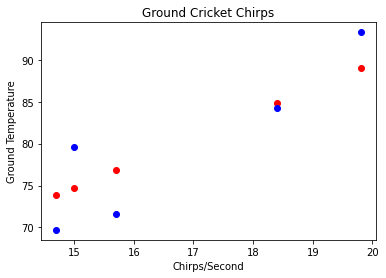

In [28]:
pl.scatter(x_test,y_predicted,color="red")
pl.scatter(x_test,y_test,color="blue")
pl.xlabel("Chirps/Second")
pl.ylabel("Ground Temperature")
pl.title("Ground Cricket Chirps")


In [29]:
#Interpolate data
ground_temperature=model.predict(np.array(18).reshape(1,1))
print(ground_temperature)

[[83.69190112]]


In [30]:
#Extrapolate data
x_train,x_test,y_train,y_test=train_test_split(y,x,test_size=0.3,random_state=1)
model=LinearRegression()
model.fit(np.array(x_train).reshape(10,1),np.array(y_train).reshape(10,1))
predicted_rate=model.predict(np.array(95).reshape(1,1))
print(predicted_rate)

[[19.55367948]]


# ASSIGNMENT 6

In [31]:
brain_body=pd.read_fwf("C:\\Users\\91701\\Desktop\\brain_body.txt")

In [32]:
brain_body

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [33]:
brain=brain_body.iloc[:,0]
body=brain_body.iloc[:,1]

In [99]:
xb_train,xb_test,yb_train,yb_test=train_test_split(brain,body,test_size=0.3,random_state=1)
model=LinearRegression()
model.fit(np.array(xb_train).reshape(43,1),np.array(yb_train).reshape(43,1))
model.predict(np.array(xb_test).reshape(19,1))

array([[616.20154059],
       [115.62748348],
       [115.57751496],
       [118.72649262],
       [116.85267314],
       [355.78867986],
       [115.65535054],
       [119.67589448],
       [149.18807079],
       [211.64872004],
       [117.95774616],
       [115.56502283],
       [116.91032912],
       [300.05456206],
       [116.08392669],
       [562.38928893],
       [116.90071979],
       [623.88900512],
       [115.65246774]])

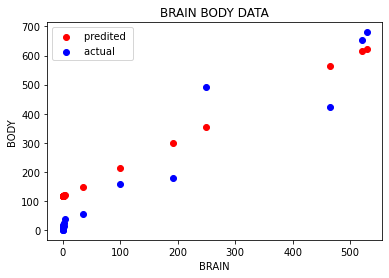

In [100]:
pl.scatter(xb_test,model.predict(np.array(xb_test).reshape(-1,1)),color="red")
pl.scatter(xb_test,yb_test,color="blue")
pl.xlabel("BRAIN")
pl.ylabel("BODY")
pl.title("BRAIN BODY DATA")
pl.legend(['predited ',"actual "])

In [101]:
if r2_score(yb_test,model.predict(np.array(xb_test).reshape(19,1)))>=0.8:
    print("good fit")
else:
    print("bad fit")

bad fit


# ASSIGNMENT 7

In [217]:
df = pd.read_fwf("C:\\Users\\91701\\Desktop\\salary.txt", header=None,
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [218]:
df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [39]:
df.columns

Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary'], dtype='object')

In [40]:
x=df.iloc[:,0:5]

In [41]:
y=df.iloc[:,5]

In [42]:
model = RandomForestClassifier()
model.fit(x,y)

RandomForestClassifier()

In [43]:
pd.DataFrame(model.feature_importances_, index = x.columns, 
             columns = ['Importances']).sort_values(by = 'Importances', ascending = False)

,Importances
YSdeg,0.396110
Year,0.351465
Rank,0.100537
Sex,0.081085
Degree,0.070803


In [44]:
#sex is not much important for salary than YSdeg,Year,Rank but more important than degree

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
model=LinearRegression()
model.fit(np.array(x_train).reshape(36,5),np.array(y_train).reshape(36,1))
model.predict(np.array(x_test).reshape(16,5))

array([[24381.82075435],
       [29428.46800669],
       [20589.00448524],
       [18859.40197764],
       [20494.20582031],
       [15893.33634178],
       [22699.57985227],
       [16415.20362437],
       [15748.68038715],
       [29017.96774707],
       [30311.97517586],
       [29223.92953369],
       [23165.05196656],
       [15487.74674585],
       [23877.67096202],
       [16081.94200576]])

In [46]:
y_test

31    23300
2     28200
42    20999
32    23713
30    21600
45    16094
33    20690
38    16700
44    16500
19    24450
10    27025
3     26775
21    20525
48    16244
24    24832
40    18075
Name: Salary, dtype: int64

In [47]:
if r2_score(y_test,model.predict(np.array(x_test).reshape(16,5)))>=0.8:
    print("good fit")
else:
    print("bad fit")

bad fit


# ASSIGNMENT 8
##Tasks, Part 1

Find the linear regression equation for mileage vs price.
Chart the original data and the equation on the chart.
Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [184]:
car=pd.read_csv("C:\\Users\\91701\\Downloads\\car_data.csv")

In [49]:
car

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [53]:
x_mil=car["Mileage"]

In [51]:
y_pr=car["Price"]

In [133]:
xm_train,xm_test,yp_train,yp_test=train_test_split(x_mil,y_pr,test_size=0.3,random_state=1)


(562,)

In [64]:
(yp_test)

pandas.core.series.Series

In [82]:
carpr=LinearRegression()
carpr.fit(np.array(xm_train).reshape(-1,1),np.array(yp_train).reshape(-1,1))
carpr.predict(np.array(xm_test).reshape(-1,1))

array([[20399.8756877 ],
       [18770.97811842],
       [24535.96451447],
       [20706.02810361],
       [19726.75716436],
       [21737.96635202],
       [22478.33989247],
       [23481.48162651],
       [22660.21261479],
       [21452.65351888],
       [21123.76701268],
       [19977.58996056],
       [20205.30976497],
       [20868.95575068],
       [21461.17880274],
       [19973.42204401],
       [21937.83689582],
       [21738.34525352],
       [21335.76240464],
       [22774.26196774],
       [20067.20016646],
       [22491.60144513],
       [21210.9143588 ],
       [23684.1939316 ],
       [24612.12371694],
       [19762.75280732],
       [19532.75959389],
       [20063.97950366],
       [22814.99387951],
       [19020.2953086 ],
       [24497.50601172],
       [20204.55196196],
       [20969.74355097],
       [18383.36187897],
       [21488.08080958],
       [20523.01867677],
       [22823.32971262],
       [20878.99664056],
       [20750.73848118],
       [18201.67860741],


In [84]:
if r2_score(yp_test,carpr.predict(np.array(xm_test).reshape(-1,1)))>=0.8:
    print("good fit")
else:
    print("bad fit")

bad fit


In [87]:
x_test.shape

(242,)

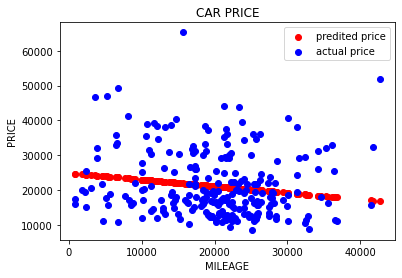

In [96]:
pl.scatter(xm_test,carpr.predict(np.array(xm_test).reshape(-1,1)),color="red")
pl.scatter(xm_test,yp_test,color="blue")
pl.xlabel("MILEAGE")
pl.ylabel("PRICE")
pl.title("CAR PRICE")
pl.legend(['predited price',"actual price"])


##Tasks, Part 2

Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

Find the combination of the factors that is the best predictor for price.

In [115]:
xcar=car.iloc[:,6:12]

In [ ]:
xcar.insert(loc=0,column="Mileage",value=car["Mileage"].values)

In [126]:
xcar

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,8221,6,3.1,4,1,1,1
1,9135,6,3.1,4,1,1,0
2,13196,6,3.1,4,1,1,0
3,16342,6,3.1,4,1,0,0
4,19832,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...
799,16229,6,3.0,4,1,0,0
800,19095,6,3.0,4,1,1,0
801,20484,6,3.0,4,1,1,0
802,25979,6,3.0,4,1,1,0


In [127]:
ycar=car["Price"]

In [128]:
ycar

0      17314.103129
1      17542.036083
2      16218.847862
3      16336.913140
4      16339.170324
           ...     
799    16507.070267
800    16175.957604
801    15731.132897
802    15118.893228
803    13585.636802
Name: Price, Length: 804, dtype: float64

In [148]:
ycp_train.shape

(562, 1)

In [152]:
xc_train,xc_test,yc_train,yc_test=train_test_split(xcar,ycar,test_size=0.3,random_state=1)
carpred=LinearRegression()
carpred.fit(xc_train,ycp_train)
carpred.predict(xc_test)

array([[27004.90308991],
       [17611.5560708 ],
       [27730.31800814],
       [14422.57210918],
       [22024.01784943],
       [12456.59150641],
       [22793.87726369],
       [28264.78112309],
       [22710.73476884],
       [19881.36966097],
       [19044.05021561],
       [31641.42549527],
       [17174.32525736],
       [19346.48615866],
       [24912.67463181],
       [23549.33800616],
       [19790.03996225],
       [20143.16918109],
       [21121.85740033],
       [19528.43765311],
       [22335.989824  ],
       [13147.20058534],
       [25246.12474706],
       [34726.11342523],
       [26500.82436486],
       [23356.28690114],
       [16370.42498567],
       [33472.2005713 ],
       [16890.05931675],
       [30764.18877435],
       [18056.6739796 ],
       [20710.2447435 ],
       [19000.40015352],
       [22467.44361241],
       [25500.11194728],
       [31829.30520727],
       [23110.01580887],
       [17791.67213636],
       [14429.10530873],
       [19437.65549495],


In [151]:
xc_train.shape
ycp_train=np.array(yc_train).reshape(-1,1)

(562, 7)

In [153]:
if r2_score(yc_test,carpred.predict(xc_test))>=0.8:
    print("good fit")
else:
    print("bad fit")

bad fit


In [171]:
importance=RandomForestRegressor()

In [172]:
importance.fit(xcar,ycar)

RandomForestRegressor()

In [176]:
pd.DataFrame(importance.feature_importances_,index=xcar.columns,columns=["importance"]).sort_values(by="importance",ascending=False)

,importance
Liter,0.519323
Cylinder,0.215287
Mileage,0.138174
Cruise,0.084511
Doors,0.024972
Sound,0.008981
Leather,0.008751


liter,cylinder,mileage is the best parameter for predicting price


###Tasks, Hard Mode


Research dummy variables in scikit-learn to see how to use the make, model, and body type.

Find the best combination of factors to predict price.

In [193]:
modifed=pd.get_dummies(car)

In [204]:
modifed

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,Make_Cadillac,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,6,3.1,4,1,1,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1,17542.036083,9135,6,3.1,4,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,16218.847862,13196,6,3.1,4,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,16336.913140,16342,6,3.1,4,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,16339.170324,19832,6,3.1,4,1,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,6,3.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,19095,6,3.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,20484,6,3.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,25979,6,3.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [197]:
xmod=modifed.iloc[:,1:98]

In [198]:
ymod=modifed.iloc[:,0]

In [200]:
carmodi=RandomForestRegressor()
carmodi.fit(xmod,ymod)

RandomForestRegressor()

In [202]:
best_com=pd.DataFrame(carmodi.feature_importances_,index=xmod.columns,columns=["importance"]).sort_values(by="importance",ascending=False)

In [210]:
best_com[best_com["importance"]>0.001] #best combination of factors to predict price.

,importance
Liter,0.261166
Cylinder,0.212544
Make_SAAB,0.199136
Make_Cadillac,0.145349
Trim_Hardtop Conv 2D,0.039921
Mileage,0.031801
Make_Pontiac,0.028623
Model_XLR-V8,0.023568
Type_Convertible,0.007405
Doors,0.006119
